In [2]:
#Data Handling LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Essentials
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler as rus
from sklearn.preprocessing import LabelEncoder

#Classification Algo
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import ExtraTreesClassifier  

#Evaluation Metrics
from sklearn.metrics import classification_report


In [3]:
df=pd.read_csv('mer.csv')
df

,Origin,Dest,FlightDate,FlightDate.1,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,ACODE
0,MCO,ORD,2016-12-01,2016-12-01,4,2016,12,1,1404.0,0.0,...,1015,61,67,18,84,82,62,2016-12-01,1400,MCO
1,MCO,MIA,2016-12-01,2016-12-01,4,2016,12,1,1510.0,1.0,...,1015,61,67,18,84,82,62,2016-12-01,1400,MCO
2,MCO,CLT,2016-12-01,2016-12-01,4,2016,12,1,1420.0,1.0,...,1015,61,67,18,84,82,62,2016-12-01,1400,MCO
3,MCO,EWR,2016-12-01,2016-12-01,4,2016,12,1,1518.0,1.0,...,1015,61,67,18,84,82,62,2016-12-01,1400,MCO
4,MCO,JFK,2016-12-01,2016-12-01,4,2016,12,1,1408.0,0.0,...,1015,61,67,18,84,82,62,2016-12-01,1400,MCO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864948,DEN,LAS,2017-01-23,2017-01-23,1,2017,1,23,2132.0,0.0,...,1001,0,28,18,39,39,90,2017-01-23,2100,DEN
1864949,DEN,LAX,2017-01-23,2017-01-23,1,2017,1,23,2119.0,0.0,...,1001,0,28,18,39,39,90,2017-01-23,2100,DEN
1864950,DEN,PHX,2017-01-23,2017-01-23,1,2017,1,23,2119.0,1.0,...,1001,0,28,18,39,39,90,2017-01-23,2100,DEN
1864951,DEN,SEA,2017-01-23,2017-01-23,1,2017,1,23,2142.0,0.0,...,1001,0,28,18,39,39,90,2017-01-23,2100,DEN


In [5]:
df['ArrDel15'].value_counts()

0.0    1475730
1.0     389223
Name: ArrDel15, dtype: int64

In [6]:
df.columns

Index(['Origin', 'Dest', 'FlightDate', 'FlightDate.1', 'Quarter', 'Year',
       'Month', 'DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime',
       'DepDelayMinutes', 'OriginAirportID', 'DestAirportID', 'ArrTime',
       'CRSArrTime', 'ArrDel15', 'ArrDelayMinutes', 'rounded_time',
       'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity', 'date', 'time', 'ACODE'],
      dtype='object')

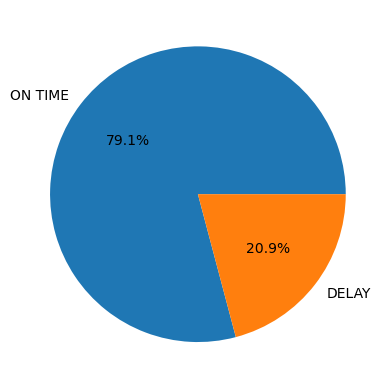

In [7]:
Y=df['ArrDel15'].value_counts()
lbs=['ON TIME','DELAY']
plt.pie(Y,labels=lbs, autopct="%1.1f%%")
plt.show()

In [8]:
df

,Origin,Dest,FlightDate,FlightDate.1,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,ACODE
0,MCO,ORD,2016-12-01,2016-12-01,4,2016,12,1,1404.0,0.0,...,1015,61,67,18,84,82,62,2016-12-01,1400,MCO
1,MCO,MIA,2016-12-01,2016-12-01,4,2016,12,1,1510.0,1.0,...,1015,61,67,18,84,82,62,2016-12-01,1400,MCO
2,MCO,CLT,2016-12-01,2016-12-01,4,2016,12,1,1420.0,1.0,...,1015,61,67,18,84,82,62,2016-12-01,1400,MCO
3,MCO,EWR,2016-12-01,2016-12-01,4,2016,12,1,1518.0,1.0,...,1015,61,67,18,84,82,62,2016-12-01,1400,MCO
4,MCO,JFK,2016-12-01,2016-12-01,4,2016,12,1,1408.0,0.0,...,1015,61,67,18,84,82,62,2016-12-01,1400,MCO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864948,DEN,LAS,2017-01-23,2017-01-23,1,2017,1,23,2132.0,0.0,...,1001,0,28,18,39,39,90,2017-01-23,2100,DEN
1864949,DEN,LAX,2017-01-23,2017-01-23,1,2017,1,23,2119.0,0.0,...,1001,0,28,18,39,39,90,2017-01-23,2100,DEN
1864950,DEN,PHX,2017-01-23,2017-01-23,1,2017,1,23,2119.0,1.0,...,1001,0,28,18,39,39,90,2017-01-23,2100,DEN
1864951,DEN,SEA,2017-01-23,2017-01-23,1,2017,1,23,2142.0,0.0,...,1001,0,28,18,39,39,90,2017-01-23,2100,DEN


/var/folders/6x/gvhz2ks54ds4gc95v5bfv_7m0000gn/T/ipykernel_6356/3327050837.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a=df.corr()


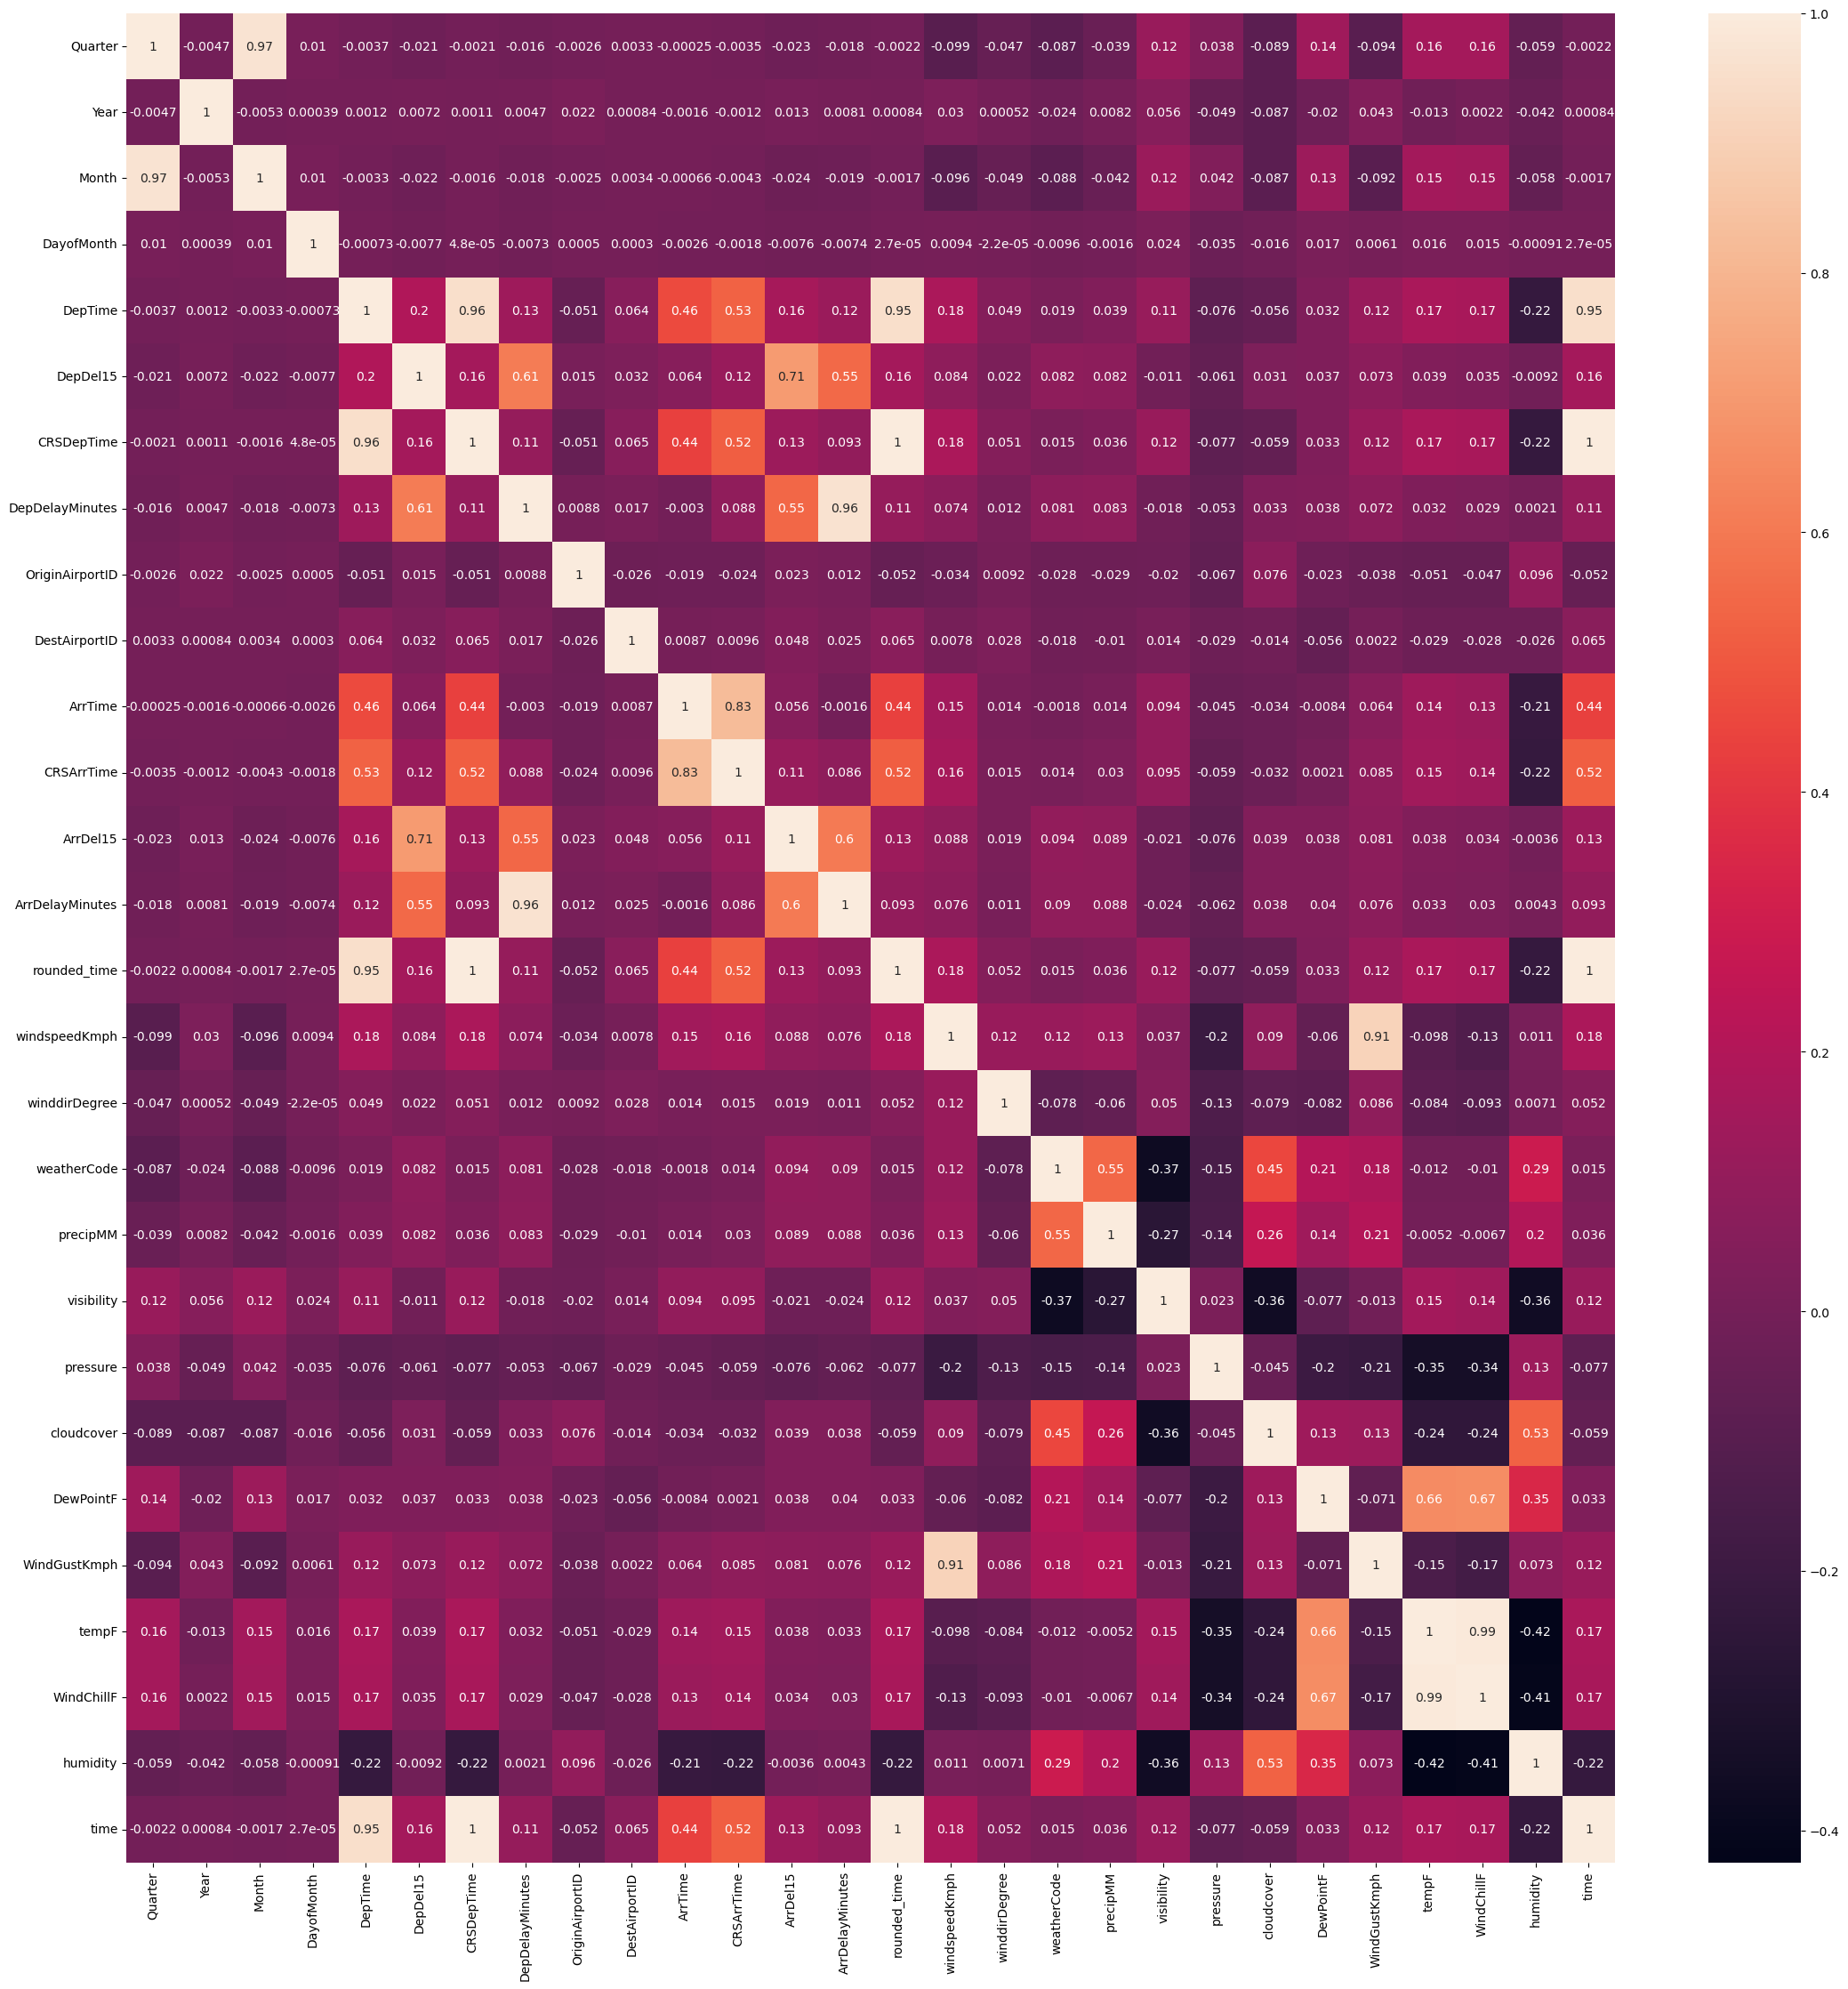

In [9]:
a=df.corr()
plt.figure(figsize=(27,27))
sns.heatmap(a,annot=True)
plt.show()

In [10]:
df.corr()['ArrDel15']


/var/folders/6x/gvhz2ks54ds4gc95v5bfv_7m0000gn/T/ipykernel_6356/4118948680.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['ArrDel15']


Quarter           -0.023270
Year               0.012782
Month             -0.023917
DayofMonth        -0.007646
DepTime            0.163259
DepDel15           0.710134
CRSDepTime         0.128520
DepDelayMinutes    0.546437
OriginAirportID    0.023193
DestAirportID      0.048041
ArrTime            0.055524
CRSArrTime         0.111477
ArrDel15           1.000000
ArrDelayMinutes    0.604086
rounded_time       0.128278
windspeedKmph      0.087623
winddirDegree      0.018735
weatherCode        0.094015
precipMM           0.088868
visibility        -0.020564
pressure          -0.075508
cloudcover         0.039469
DewPointF          0.038007
WindGustKmph       0.080937
tempF              0.037746
WindChillF         0.033876
humidity          -0.003579
time               0.128278
Name: ArrDel15, dtype: float64

In [11]:
df_1 = df.drop(['FlightDate','ArrTime','FlightDate.1','date','time','ACODE','DayofMonth','DepDel15','ArrDelayMinutes','rounded_time','OriginAirportID','DestAirportID','DepDelayMinutes',],axis=1)

In [12]:
df_1.columns
df_1.corr()['ArrDel15']

/var/folders/6x/gvhz2ks54ds4gc95v5bfv_7m0000gn/T/ipykernel_6356/112882939.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_1.corr()['ArrDel15']


Quarter         -0.023270
Year             0.012782
Month           -0.023917
DepTime          0.163259
CRSDepTime       0.128520
CRSArrTime       0.111477
ArrDel15         1.000000
windspeedKmph    0.087623
winddirDegree    0.018735
weatherCode      0.094015
precipMM         0.088868
visibility      -0.020564
pressure        -0.075508
cloudcover       0.039469
DewPointF        0.038007
WindGustKmph     0.080937
tempF            0.037746
WindChillF       0.033876
humidity        -0.003579
Name: ArrDel15, dtype: float64

In [13]:
X=df_1.drop(['ArrDel15'],axis=1)
Y=df_1['ArrDel15']
Y

0          0.0
1          1.0
2          1.0
3          1.0
4          0.0
          ... 
1864948    0.0
1864949    0.0
1864950    1.0
1864951    0.0
1864952    0.0
Name: ArrDel15, Length: 1864953, dtype: float64

In [14]:
X.dtypes

Origin            object
Dest              object
Quarter            int64
Year               int64
Month              int64
DepTime          float64
CRSDepTime         int64
CRSArrTime         int64
windspeedKmph      int64
winddirDegree      int64
weatherCode        int64
precipMM         float64
visibility         int64
pressure           int64
cloudcover         int64
DewPointF          int64
WindGustKmph       int64
tempF              int64
WindChillF         int64
humidity           int64
dtype: object

In [15]:
lben=LabelEncoder()
X['Origin']= lben.fit_transform(X['Origin'])
X['Dest']= lben.fit_transform(X['Dest'])

In [16]:
Y.value_counts()

0.0    1475730
1.0     389223
Name: ArrDel15, dtype: int64

In [17]:
sm = SMOTE(random_state=10)
X , Y = sm.fit_resample(X , Y)

In [18]:
X.to_csv('SMOTEX.csv')
Y.to_csv('SMOTEY.csv')

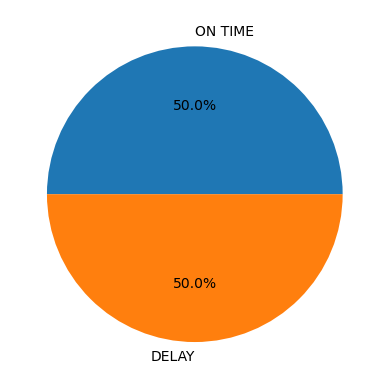

In [19]:
y=Y.value_counts()
lbs=['ON TIME','DELAY']
plt.pie(y,labels=lbs, autopct="%1.1f%%")
plt.show()

In [20]:
Y.value_counts()

0.0    1475730
1.0    1475730
Name: ArrDel15, dtype: int64

TRAIN AND TEST SPLIT

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [87]:
Lreg = LogisticRegression(solver='lbfgs', max_iter=3000)
Lreg.fit(X_train,Y_train)

/Users/prithvikiran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000)

In [88]:
Y_pred = Lreg.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.61      0.61    442413
         1.0       0.61      0.61      0.61    443025

    accuracy                           0.61    885438
   macro avg       0.61      0.61      0.61    885438
weighted avg       0.61      0.61      0.61    885438



In [89]:
ETC=ExtraTreesClassifier()
ETC.fit(X_train,Y_train)
Y_pred=ETC.predict(X_test)
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86    442413
         1.0       0.87      0.84      0.85    443025

    accuracy                           0.85    885438
   macro avg       0.85      0.85      0.85    885438
weighted avg       0.85      0.85      0.85    885438



In [90]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
Y_pred=DTC.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79    442413
         1.0       0.78      0.79      0.79    443025

    accuracy                           0.79    885438
   macro avg       0.79      0.79      0.79    885438
weighted avg       0.79      0.79      0.79    885438



In [22]:
RFC=RandomForestClassifier(n_jobs=-1)
RFC.fit(X_train,Y_train)
Y_pred=RFC.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93    442413
         1.0       0.95      0.90      0.92    443025

    accuracy                           0.93    885438
   macro avg       0.93      0.93      0.93    885438
weighted avg       0.93      0.93      0.93    885438



In [92]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,Y_train)
Y_pred=GBC.predict(X_test)
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

         0.0       0.69      0.70      0.69    442413
         1.0       0.70      0.69      0.69    443025

    accuracy                           0.69    885438
   macro avg       0.69      0.69      0.69    885438
weighted avg       0.69      0.69      0.69    885438



In [24]:
import pickle
with open('RFC.pkl', 'wb') as file:
    pickle.dump(RFC,file)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [46]:
rus = RandomUnderSampler()
X , Y = rus.fit_resample(X , Y)

NameError: name 'RandomUnderSampler' is not defined

In [ ]:
print(Y.value_counts())

In [ ]:
pie= np.array(Y.value_counts().tolist())
mylabels =["ON Time", "Delay"]
plt.pie(pie,labels=mylabels,autopct="%1.1f%%")
plt.show()

In [ ]:
Lreg = LogisticRegression(solver='lbfgs', max_iter=3000)
Lreg.fit(X_train,Y_train)
Y_pred = Lreg.predict(X_test)
print(classification_report(Y_test,Y_pred))


In [ ]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
Y_pred=DTC.predict(X_test)
print(classification_report(Y_test,Y_pred))

In [ ]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
Y_pred=RFC.predict(X_test)
print(classification_report(Y_test,Y_pred))

In [ ]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,Y_train)
Y_pred=GBC.predict(X_test)
print(classification_report(Y_test,Y_pred))

In [ ]:
ETC=ExtraTreesClassifier()
ETC.fit(X_train,Y_train)
Y_pred=ETC.predict(X_test)
print(classification_report(Y_test,Y_pred))

In [62]:
X.columns


Index(['Origin', 'Dest', 'Quarter', 'Year', 'Month', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'windspeedKmph', 'winddirDegree',
       'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
       'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity'],
      dtype='object')